Я решил проанализировать датасет с информацией о биатлоне на олимпийских играх и ответиь на вопросы

Импортирую необходимые библиотеки 

In [350]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Читаю файл с данными

In [351]:
df_biathlon = pd.read_csv('biathlon_medals.csv')
df_biathlon.head()

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
0,12.5km Pursuit,GOLD,France,Quentin FILLON MAILLET,https://olympics.com/en/athletes/quentin-fillo...,Men,Athlete,2022,beijing
1,12.5km Pursuit,SILVER,Norway,Tarjei BOE,https://olympics.com/en/athletes/tarjei-boe,Men,Athlete,2022,beijing
2,12.5km Pursuit,BRONZE,ROC,Eduard LATYPOV,https://olympics.com/en/athletes/eduard-latypov,Men,Athlete,2022,beijing
3,Mixed Relay 4x6km (W+M),GOLD,Norway,NaN,NaN,Mixed,GameTeam,2022,beijing
4,Mixed Relay 4x6km (W+M),SILVER,France,NaN,NaN,Mixed,GameTeam,2022,beijing


Информация о типе данных каждой колонки

In [352]:
df_biathlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_title       286 non-null    object
 1   medal             286 non-null    object
 2   country           286 non-null    object
 3   athlete           206 non-null    object
 4   athlete_url       199 non-null    object
 5   gender            286 non-null    object
 6   participant_type  286 non-null    object
 7   year              286 non-null    int64 
 8   city              286 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.2+ KB


Проверка есть ли пустые ячейки NaN

In [353]:
df_biathlon.isnull().sum()

event_title          0
medal                0
country              0
athlete             80
athlete_url         87
gender               0
participant_type     0
year                 0
city                 0
dtype: int64

Подмечаю, что пустые ячейки в колонке athlete и athele_url - это эстафеты, в которых медаль получает сборная, а не человек

Меняем ROC, на Russia, так как это российские спортсмены, German Democratic Republic (Germany) на Germany, так как это Германия

In [354]:
df_biathlon.loc[df_biathlon['country'] == 'ROC', 'country'] = 'Russian Federation'
df_biathlon.loc[df_biathlon['country'] == 'German Democratic Republic (Germany)', 'country'] = 'Germany'

df_biathlon

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
0,12.5km Pursuit,GOLD,France,Quentin FILLON MAILLET,https://olympics.com/en/athletes/quentin-fillo...,Men,Athlete,2022,beijing
1,12.5km Pursuit,SILVER,Norway,Tarjei BOE,https://olympics.com/en/athletes/tarjei-boe,Men,Athlete,2022,beijing
2,12.5km Pursuit,BRONZE,Russian Federation,Eduard LATYPOV,https://olympics.com/en/athletes/eduard-latypov,Men,Athlete,2022,beijing
3,Mixed Relay 4x6km (W+M),GOLD,Norway,NaN,NaN,Mixed,GameTeam,2022,beijing
4,Mixed Relay 4x6km (W+M),SILVER,France,NaN,NaN,Mixed,GameTeam,2022,beijing
...,...,...,...,...,...,...,...,...,...
281,20km Individual,SILVER,Soviet Union,Aleksandr PRIVALOV,https://olympics.com/en/athletes/aleksandr-pri...,Men,Athlete,1964,innsbruck
282,20km Individual,BRONZE,Norway,Olav JORDET,https://olympics.com/en/athletes/olav-jordet,Men,Athlete,1964,innsbruck
283,20km Individual,GOLD,Sweden,Klas LESTANDER,https://olympics.com/en/athletes/klas-lestander,Men,Athlete,1960,squaw-valley
284,20km Individual,SILVER,Finland,Antti TYRVÄINEN,https://olympics.com/en/athletes/antti-tyrvainen,Men,Athlete,1960,squaw-valley


1. Кто завоевал больше всего личных золотых медалей олимпиад в истории?

Сортируем, оставляя данные только золотых медалистов

In [355]:
gold_meadals = df_biathlon[df_biathlon['medal'] == 'GOLD']
gold_meadals

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
0,12.5km Pursuit,GOLD,France,Quentin FILLON MAILLET,https://olympics.com/en/athletes/quentin-fillo...,Men,Athlete,2022,beijing
3,Mixed Relay 4x6km (W+M),GOLD,Norway,NaN,NaN,Mixed,GameTeam,2022,beijing
7,12.5km Mass Start,GOLD,France,Justine BRAISAZ,https://olympics.com/en/athletes/braisaz,Women,Athlete,2022,beijing
11,10km Pursuit,GOLD,Norway,Marte Olsbu ROEISELAND,https://olympics.com/en/athletes/marte-olsbu-r...,Women,Athlete,2022,beijing
13,10km Sprint,GOLD,Norway,Johannes Thingnes BOE,https://olympics.com/en/athletes/johannes-thin...,Men,Athlete,2022,beijing
...,...,...,...,...,...,...,...,...,...
271,4x7.5km Relay,GOLD,Soviet Union,NaN,NaN,Men,GameTeam,1972,sapporo
274,4x7.5km Relay,GOLD,Soviet Union,NaN,NaN,Men,GameTeam,1968,grenoble
277,20km Individual,GOLD,Norway,Magnar SOLBERG,https://olympics.com/en/athletes/magnar-solberg,Men,Athlete,1968,grenoble
280,20km Individual,GOLD,Soviet Union,Vladimir MELANIN,https://olympics.com/en/athletes/vladimir-melanin,Men,Athlete,1964,innsbruck


Считаем сколько раз встречается имя спортсмена в датасете золотых медалистов

In [356]:
top_gold = gold_meadals['athlete'].value_counts()
top_gold

athlete
Ole Einar BJØRNDALEN       5
Martin FOURCADE            4
Darya DOMRACHEVA           3
Johannes Thingnes BOE      3
Anastasiya KUZMINA         3
Quentin FILLON MAILLET     2
Magnar SOLBERG             2
Frank-Peter ROETSCH        2
Myriam BEDARD              2
Michael GREIS              2
Magdalena NEUNER           2
Kati WILHELM               2
Emil Hegle SVENDSEN        2
Laura DAHLMEIER            2
Marte Olsbu ROEISELAND     2
Denise HERRMANN            1
Sergey Chepikov            1
Yevgeny REDKIN             1
Anfisa REZTSOVA            1
Mark KIRCHNER              1
Antje HARVEY               1
Eirik KVALFOSS             1
Peter ANGERER              1
Hanna OEBERG               1
Anatoly ALYABYEV           1
Frank ULLRICH              1
Nikolay KRUGLOV            1
Vladimir MELANIN           1
Sergei TARASOV             1
Halvard HANEVOLD           1
Tora BERGER                1
Ekaterina DAFOVSKA         1
Galina Kukleva             1
Olga PYLEVA                1
Andrea

Больше всего золотых медалей олимпиады в личных гонках у Ole Einar BJØRNDALEN

2. Кто среди россиян завоевал больше всего медалей олимпиад в истории?

Создаем датасет из российских спортсменов

In [357]:
russia = df_biathlon[df_biathlon['country'] == 'Russian Federation']
russia.head()

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
2,12.5km Pursuit,BRONZE,Russian Federation,Eduard LATYPOV,https://olympics.com/en/athletes/eduard-latypov,Men,Athlete,2022,beijing
5,Mixed Relay 4x6km (W+M),BRONZE,Russian Federation,NaN,NaN,Mixed,GameTeam,2022,beijing
19,4x6km Relay,SILVER,Russian Federation,NaN,NaN,Women,GameTeam,2022,beijing
29,4x7.5km Relay,BRONZE,Russian Federation,NaN,NaN,Men,GameTeam,2022,beijing
74,4x7.5km Relay,GOLD,Russian Federation,NaN,NaN,Men,GameTeam,2014,sochi


Считаем каждый раз, когда имя встречается в колонке, что означает, что спортсмен получил медаль

In [358]:
top_russia = russia['athlete'].value_counts()
top_russia

athlete
Albina AKHATOVA          2
Sergei TARASOV           2
Eduard LATYPOV           1
Evgeniy GARANICHEV       1
Olga ZAYTSEVA            1
Evgeny USTYUGOV          1
Svetlana ISHMOURATOVA    1
Olga PYLEVA              1
Viktor Maygurov          1
Galina Kukleva           1
Sergey Chepikov          1
Name: count, dtype: int64

Альбина Ахатова и Сергей Тарасов завоевали по две медали олимпийских игр, что является самым выском показателем среди россиян

3. Какой топ 5 стран, в общем медальном зачете среди мужчин?

Создаем датасет с фильтром на мужчин

In [359]:
men = df_biathlon[df_biathlon['gender'] == 'Men']
men

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
0,12.5km Pursuit,GOLD,France,Quentin FILLON MAILLET,https://olympics.com/en/athletes/quentin-fillo...,Men,Athlete,2022,beijing
1,12.5km Pursuit,SILVER,Norway,Tarjei BOE,https://olympics.com/en/athletes/tarjei-boe,Men,Athlete,2022,beijing
2,12.5km Pursuit,BRONZE,Russian Federation,Eduard LATYPOV,https://olympics.com/en/athletes/eduard-latypov,Men,Athlete,2022,beijing
12,10km Sprint,SILVER,France,Quentin FILLON MAILLET,https://olympics.com/en/athletes/quentin-fillo...,Men,Athlete,2022,beijing
13,10km Sprint,GOLD,Norway,Johannes Thingnes BOE,https://olympics.com/en/athletes/johannes-thin...,Men,Athlete,2022,beijing
...,...,...,...,...,...,...,...,...,...
281,20km Individual,SILVER,Soviet Union,Aleksandr PRIVALOV,https://olympics.com/en/athletes/aleksandr-pri...,Men,Athlete,1964,innsbruck
282,20km Individual,BRONZE,Norway,Olav JORDET,https://olympics.com/en/athletes/olav-jordet,Men,Athlete,1964,innsbruck
283,20km Individual,GOLD,Sweden,Klas LESTANDER,https://olympics.com/en/athletes/klas-lestander,Men,Athlete,1960,squaw-valley
284,20km Individual,SILVER,Finland,Antti TYRVÄINEN,https://olympics.com/en/athletes/antti-tyrvainen,Men,Athlete,1960,squaw-valley


Создаем датасет для гистограммы с топ 5 странами по медалям

In [360]:
sum_men = pd.DataFrame(men['country'].value_counts().nlargest(5))
sum_men['summa'] = men['country'].value_counts()
sum_men['country'] = ['Germany', 'Norway', 'France', 'Russian Federation', 'Soviet Union']
sum_men


,count,summa,country
country,,,
Norway,37,37,Germany
Germany,35,35,Norway
Soviet Union,19,19,France
France,18,18,Russian Federation
Russian Federation,13,13,Soviet Union


Делаем гистограмму

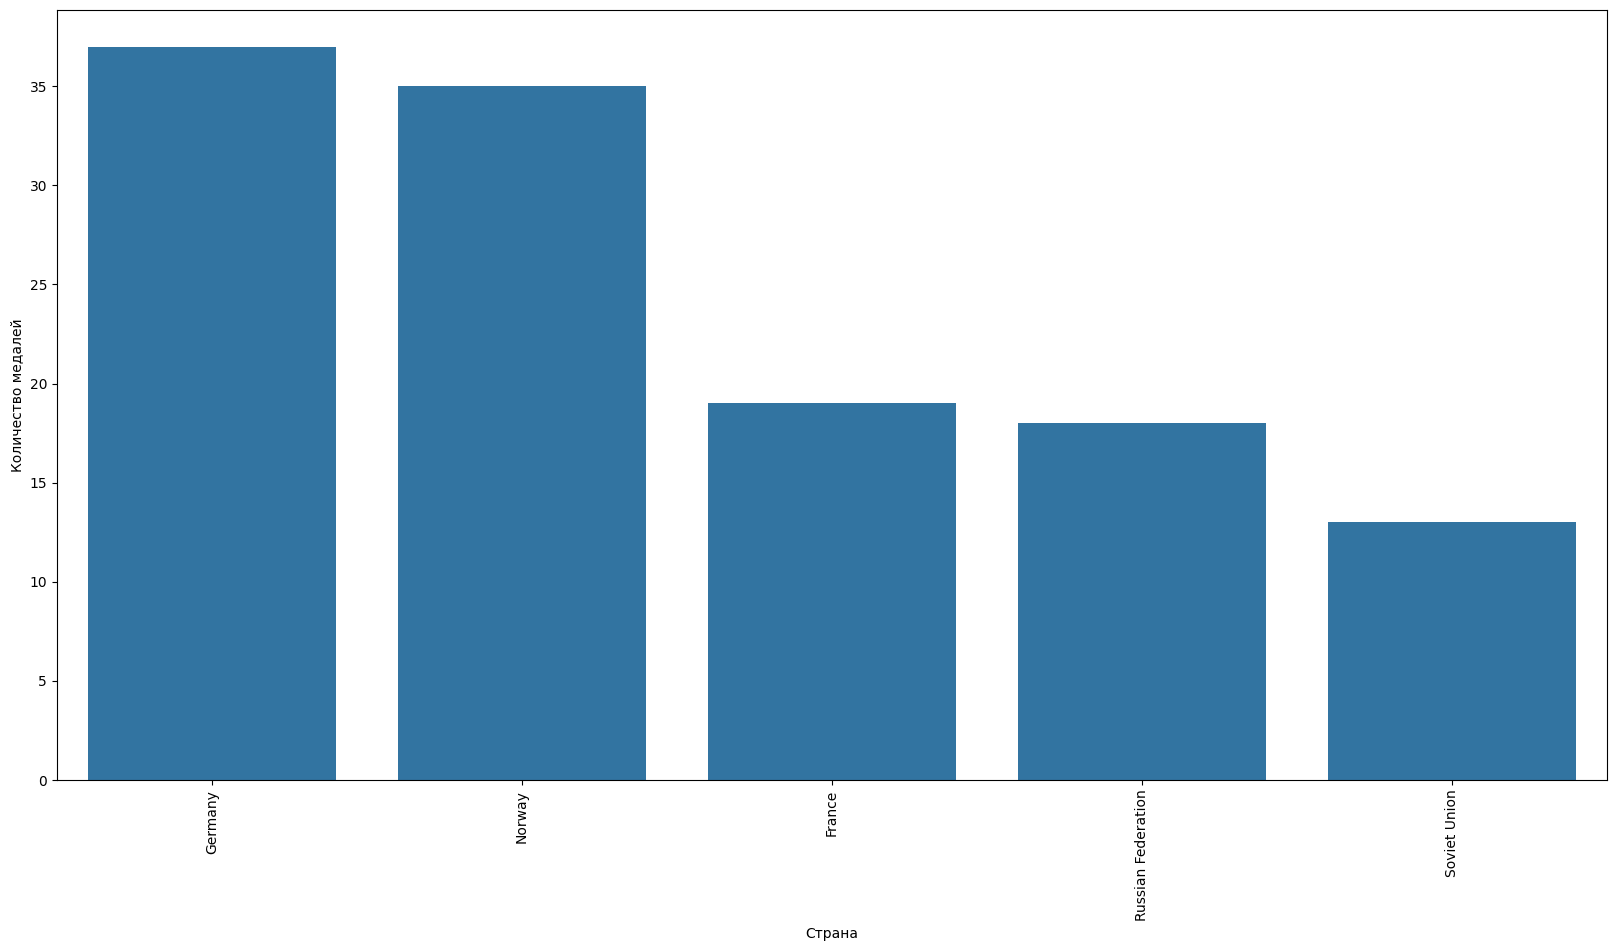

In [361]:
plt.figure(figsize=(20, 10))
sns.barplot(x=sum_men['country'], y=sum_men['summa'])
plt.xticks(rotation=90)
plt.xlabel('Страна')
plt.ylabel('Количество медалей')
plt.show()

Получаем вот такой топ-5

4. Какой топ 5 стран, в общем медальном зачете среди женщин?

Также есть способ и без графика. Применим его для анализа данных женщин

Также фильтруем их

In [363]:
women = df_biathlon[df_biathlon['gender'] == 'Women']
women

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
6,12.5km Mass Start,SILVER,Norway,Tiril ECKHOFF,https://olympics.com/en/athletes/tiril-eckhoff,Women,Athlete,2022,beijing
7,12.5km Mass Start,GOLD,France,Justine BRAISAZ,https://olympics.com/en/athletes/braisaz,Women,Athlete,2022,beijing
8,12.5km Mass Start,BRONZE,Norway,Marte Olsbu ROEISELAND,https://olympics.com/en/athletes/marte-olsbu-r...,Women,Athlete,2022,beijing
9,10km Pursuit,SILVER,Sweden,Elvira OEBERG,https://olympics.com/en/athletes/elvira-oeberg,Women,Athlete,2022,beijing
10,10km Pursuit,BRONZE,Norway,Tiril ECKHOFF,https://olympics.com/en/athletes/tiril-eckhoff,Women,Athlete,2022,beijing
...,...,...,...,...,...,...,...,...,...
227,15km Individual,SILVER,Unified Team,Svetlana PECHERSKAYA,https://olympics.com/en/athletes/svetlana-pech...,Women,Athlete,1992,albertville
228,15km Individual,BRONZE,Canada,Myriam BEDARD,https://olympics.com/en/athletes/myriam-bedard,Women,Athlete,1992,albertville
229,3x7.5km Relay,GOLD,France,NaN,NaN,Women,GameTeam,1992,albertville
230,3x7.5km Relay,SILVER,Germany,NaN,NaN,Women,GameTeam,1992,albertville


И используем head(), благодаря чему мы выводим только первые 5 значений

In [364]:
top_country_women = women['country'].value_counts()
top_country_women.head()

country
Germany               30
Norway                15
France                12
Russian Federation    12
Sweden                 9
Name: count, dtype: int64

Теперь я могу сравнить топ 5 стран в медальном зачете у мужчин и у женщин. Что у мужчин, что у женщин в топ 5 почти одинаковые страны, Среди них Норвегия, Россия, Франция, Германия, Швеция. Единственное отличие - это наличие в топе у мужчин СССР. Несмотря на то, что это страны не существует уже более 30 лет, СССР до сих пор входит в топ.

5. В каком виде дистанций было разыграно больше всего медалей?

Создаем список с наименованиями всех видов дистанций

In [365]:
events = df_biathlon['event_title']
event = []
for i in events:
    if i not in event:
        event.append(i)
event

['12.5km Pursuit',
 'Mixed Relay 4x6km (W+M)',
 '12.5km Mass Start',
 '10km Pursuit',
 '10km Sprint',
 '7.5km Sprint',
 '4x6km Relay',
 '15km Mass Start',
 '20km Individual',
 '4x7.5km Relay',
 '15km Individual',
 'Mixed Relay 2x6km + 2x7.5km (W+M)',
 '3x7.5km Relay']

Делаем диаграмму на основе этих данных

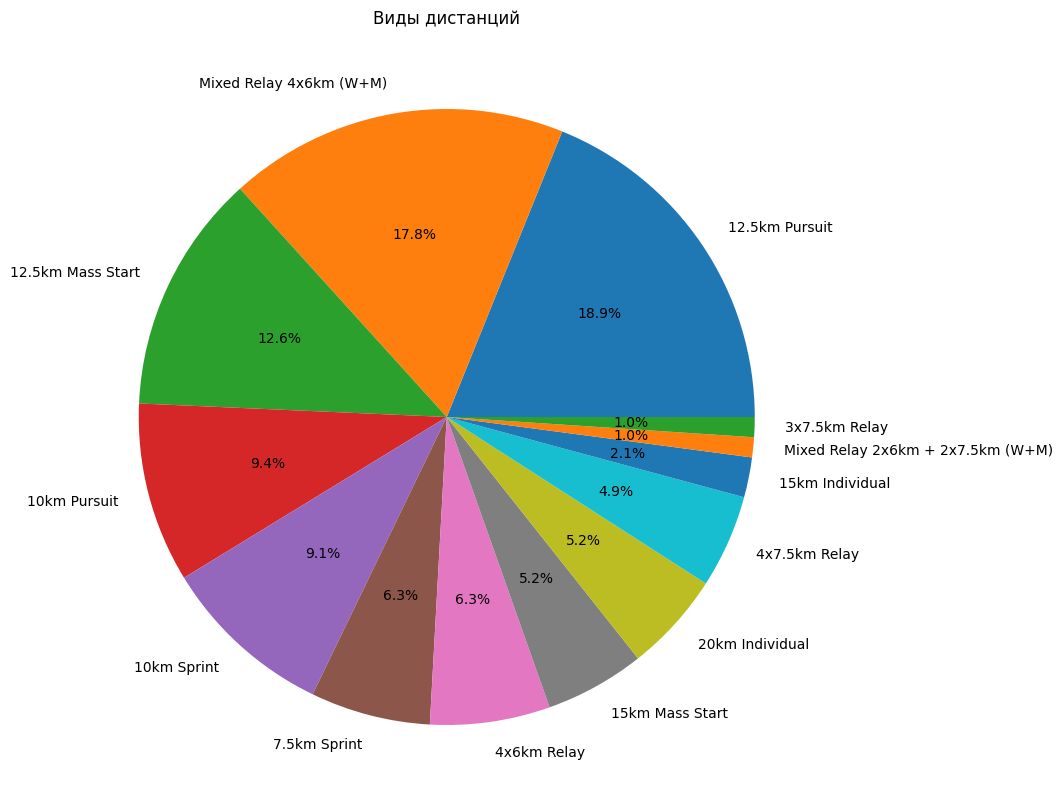

In [366]:
plt.figure(figsize=(10, 10))
plt.pie(df_biathlon['event_title'].value_counts(), labels=event, autopct='%1.1f%%')
plt.title('Виды дистанций')
plt.show()

Видим, что больше всего дистанций на олимпийских играх были вида Гонка преследования 12,5 км

6. На какой олимпиаде было проведено больше всего гонок?

In [368]:
df_biathlon['year'].value_counts()

year
2022    33
2018    33
2014    31
2010    30
2006    30
2002    24
1994    18
1992    18
1998    18
1988     9
1984     9
1980     9
1976     6
1972     6
1968     6
1964     3
1960     3
Name: count, dtype: int64

Можем заметить, что с каждым годом проводилось все больше гонок, следовательно в 2022 году было больше всего, в именно 33 гонки.

7. Кто был первым олимпийским чемпионом по биатлону?

Нетрудно заметить, что в верхней части датасета у нас данные 2022 года, значит для того, чтобы обратиться к самым первым данным, нам достаточно использовать tail(), который выводит последние 5 строк датасета

In [370]:
df_biathlon.tail()

,event_title,medal,country,athlete,athlete_url,gender,participant_type,year,city
281,20km Individual,SILVER,Soviet Union,Aleksandr PRIVALOV,https://olympics.com/en/athletes/aleksandr-pri...,Men,Athlete,1964,innsbruck
282,20km Individual,BRONZE,Norway,Olav JORDET,https://olympics.com/en/athletes/olav-jordet,Men,Athlete,1964,innsbruck
283,20km Individual,GOLD,Sweden,Klas LESTANDER,https://olympics.com/en/athletes/klas-lestander,Men,Athlete,1960,squaw-valley
284,20km Individual,SILVER,Finland,Antti TYRVÄINEN,https://olympics.com/en/athletes/antti-tyrvainen,Men,Athlete,1960,squaw-valley
285,20km Individual,BRONZE,Soviet Union,Aleksandr PRIVALOV,https://olympics.com/en/athletes/aleksandr-pri...,Men,Athlete,1960,squaw-valley


Первым олимпийским чемпионом был швед Клас Лестандер в индивидуальной гонке на 20 км

Я проанализировал датасет с данными о призерах олимпийских игр по биатлону. Благодаря этому узнал какие страны показывали лучшие результаты, сравнил результаты мужчин и женщин, определил самых титулованных спортсменов. Тем самым я закрепил свои знания и умения в работе с данными и получил больше практических навыков, которые я смогу применять в дальнейшем.